In [10]:
## Smart Steal Task

In [40]:
import pandas as pd
import numpy as np
import datetime

In [53]:
## importing clustering libraries

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
cd 'C:\\Users\\dardeer\\Desktop\\job application\\tableau dashboards\\powerbi-task'

[WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: "'C:\\\\Users\\\\dardeer\\\\Desktop\\\\job application\\\\tableau dashboards\\\\powerbi-task'"
C:\Users\dardeer\Desktop\job application\tableau dashboards\powerbi-task


In [7]:
data=pd.read_csv("data.csv")

In [9]:
data

,defect_id,defect_type,material_grade,product_id,date,dataset
0,96,1086,Grade 2,15429,2020-12-01,Training
1,999,1151,Grade KP,3405,2021-01-04,Training
2,1405,1098,Grade 2,1571,2020-12-15,Training
3,870,1098,Grade A,3851,2021-01-23,Training
4,6229,1045,Grade 2,4676,2020-12-02,Test
...,...,...,...,...,...,...
6617,3828,1078,Grade KP,206,2020-12-07,Training
6618,5289,1086,Grade 2,9822,2020-12-01,Test
6619,5324,1098,Grade 2,4710,2020-12-17,Test
6620,5504,1052,Grade 2,15453,2021-01-23,Test


#### Assessing the Data

In [14]:
data.dataset.groupby(data.dataset).count()

dataset
Test        1606
Training    5016
Name: dataset, dtype: int64

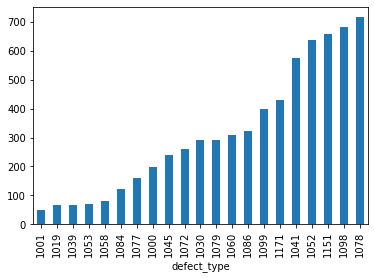

In [26]:
data.defect_type.groupby(data.defect_type).count().sort_values().plot(kind='bar')

In [27]:
data.material_grade.groupby(data.material_grade).count()

material_grade
Grade 1      1270
Grade 1P     1379
Grade 2      1709
Grade 2P      636
Grade A       242
Grade AP      233
Grade B1      577
Grade K1       29
Grade KP      152
Grade P1       37
Grade W1       18
Grade W1P      17
Grade W2P       3
Grade WP       33
Name: material_grade, dtype: int64

In [30]:
data.product_id.groupby(data.product_id).count().sort_values(ascending=False)

product_id
1407    149
8574    134
3405    129
3082    107
7273    106
       ... 
7618      1
1924      1
1892      1
1880      1
25        1
Name: product_id, Length: 583, dtype: int64

In [32]:
data.date

0       2020-12-01
1       2021-01-04
2       2020-12-15
3       2021-01-23
4       2020-12-02
           ...    
6617    2020-12-07
6618    2020-12-01
6619    2020-12-17
6620    2021-01-23
6621    2021-01-23
Name: date, Length: 6622, dtype: object

### quality issue

1. date type 'object' not 'datetime'

solution

pd.to_datetime() ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
sklearn: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.




In [38]:
data.groupby(pd.DatetimeIndex(data['date']).year).count()

,defect_id,defect_type,material_grade,product_id,date,dataset
date,,,,,,
2020,3358,3358,3230,3358,3358,3358
2021,3264,3264,3105,3264,3264,3264


In [45]:
data.groupby(pd.to_datetime(data['date']).dt.to_period('M')).count()


# ref: https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

,defect_id,defect_type,material_grade,product_id,date,dataset
date,,,,,,
2020-12,3358,3358,3230,3358,3358,3358
2021-01,3264,3264,3105,3264,3264,3264


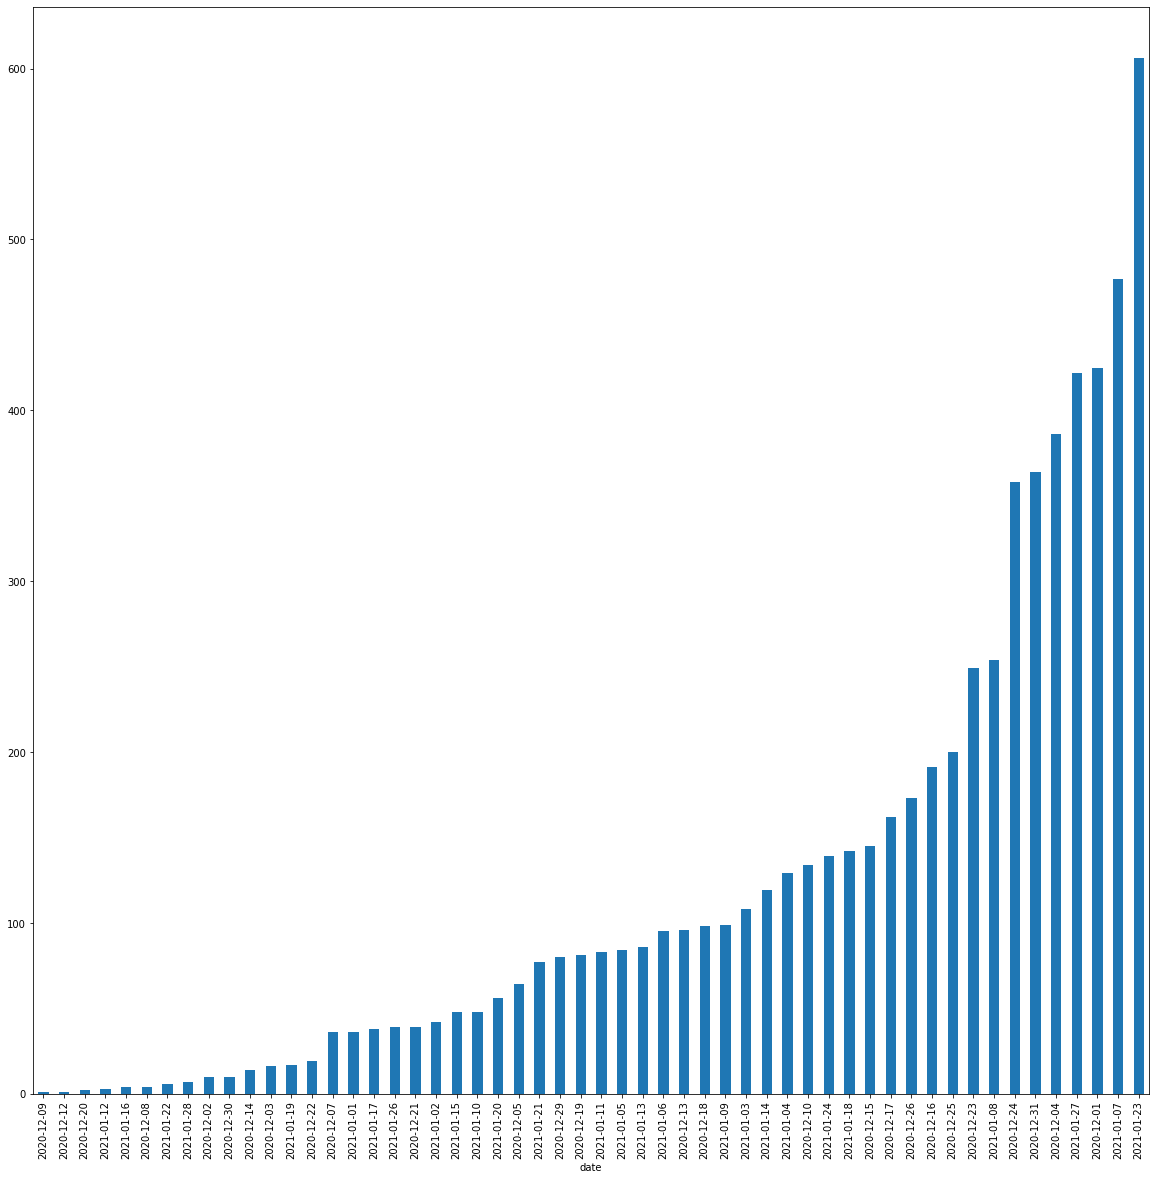

In [46]:
data.date.groupby(data.date).count().sort_values().plot(kind='bar',figsize=(20,20))

#### Quality issue 2

cann't corr two strings

solution: 
change strings to categoral values to find corr then run the model on them 



In [ ]:
#change string to categoral to find the corr
# ref: https://stackoverflow.com/questions/51241575/calculate-correlation-between-columns-of-strings/51241909
clear['defect_type']=clear['defect_type'].astype('category').cat.codes
clear['material_grade']=clear['material_grade'].astype('category').cat.codes
clear.corr()

#### split the database training and testing 

In [51]:
train=data[data['dataset']=='Training']
test=data[data['dataset']=='Test']


In [52]:
train

,defect_id,defect_type,material_grade,product_id,date,dataset
0,96,1086,Grade 2,15429,2020-12-01,Training
1,999,1151,Grade KP,3405,2021-01-04,Training
2,1405,1098,Grade 2,1571,2020-12-15,Training
3,870,1098,Grade A,3851,2021-01-23,Training
6,2187,1052,Grade 2,3692,2021-01-08,Training
...,...,...,...,...,...,...
6611,4482,1171,Grade 1P,6020,2021-01-27,Training
6613,471,1041,Grade 1,2699,2020-12-23,Training
6616,3148,1078,Grade 1,3423,2021-01-18,Training
6617,3828,1078,Grade KP,206,2020-12-07,Training


In [58]:
## data prepration splitting between features and labels

labels=train['defect_type']
features=train[['material_grade']]

In [59]:
logreg_clf = LogisticRegression()

In [60]:
logreg_clf.fit(features, labels)

ValueError: could not convert string to float: 'Grade 2'

In [71]:
clear=train[['defect_type','material_grade']]

In [74]:
#change string to categoral to find the corr
# ref: https://stackoverflow.com/questions/51241575/calculate-correlation-between-columns-of-strings/51241909
clear['defect_type']=clear['defect_type'].astype('category').cat.codes
clear['material_grade']=clear['material_grade'].astype('category').cat.codes
clear.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,defect_type,material_grade
defect_type,1.000000,0.030642
material_grade,0.030642,1.000000


In [75]:
clear

,defect_type,material_grade
0,16,2
1,19,8
2,17,2
3,17,4
6,7,2
...,...,...
6611,20,1
6613,5,0
6616,13,0
6617,13,8
